<a href="https://colab.research.google.com/github/SofiaMarchesi/Titanic/blob/main/Titanic_Name_Age_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/train.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Datasets/test.csv')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
train1= train.copy()
test1 = test.copy()

Change the name to his title (Misses, Mr, etc), it can have an influence in the target value (die or not die)

In [ ]:
train1['Name'] = train1["Name"].str.split(", ").str.get(1).str.split(".").str.get(0)
test1['Name'] = test1["Name"].str.split(", ").str.get(1).str.split(".").str.get(0)

In [ ]:
train1['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [ ]:
test1
test1['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)


Have 86 rows of the test without age, and 177 in the train set

In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_group = train1.groupby(['Sex','Name'])['Age'].mean()
train_group

Sex     Name        
female  Dr              49.000000
        Lady            48.000000
        Miss            21.773973
        Mlle            24.000000
        Mme             24.000000
        Mrs             35.898148
        Ms              28.000000
        the Countess    33.000000
male    Capt            70.000000
        Col             58.000000
        Don             40.000000
        Dr              40.600000
        Jonkheer        38.000000
        Major           48.500000
        Master           4.574167
        Mr              32.368090
        Rev             43.166667
        Sir             49.000000
Name: Age, dtype: float64

There are a great influence in the age in function of title of the person. The NaN will be replace with the mean of age of each title.

In [ ]:
null = train1[train1['Age'].isna()]
null['Age'] = null['Age'].fillna(-1)

print(null['Age'].value_counts())

null_count = null.groupby(['Sex','Name'])['Age'].count()
print(null_count)

-1.0    177
Name: Age, dtype: int64
Sex     Name  
female  Miss       36
        Mrs        17
male    Dr          1
        Master      4
        Mr        119
Name: Age, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:

test_group = test1.groupby(['Sex','Name'])['Age'].mean()
test_group

Sex     Name  
female  Dona      39.000000
        Miss      21.774844
        Mrs       38.903226
        Ms              NaN
male    Col       50.000000
        Dr        53.000000
        Master     7.406471
        Mr        32.000000
        Rev       35.500000
Name: Age, dtype: float64

In [ ]:
null_test = test1[test1['Age'].isna()]
null_test['Age'] = null_test['Age'].fillna(-1)

print(null_test['Age'].value_counts())

null_count_ = null_test.groupby(['Sex','Name'])['Age'].count()
print(null_count_)

-1.0    86
Name: Age, dtype: int64
Sex     Name  
female  Miss      14
        Mrs       10
        Ms         1
male    Master     4
        Mr        57
Name: Age, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Analysing the dataset train and test, we can see a great variance of values. So, will use the both data - train and test for more reasonable estimate

In [ ]:
train_cut = train1[['Name','Age']]
#train_cut = train_cut.set_index('Name')
train_cut


,Name,Age
0,Mr,22.0
1,Mrs,38.0
2,Miss,26.0
3,Mrs,35.0
4,Mr,35.0
...,...,...
886,Rev,27.0
887,Miss,19.0
888,Miss,NaN
889,Mr,26.0


In [ ]:
test_cut = test1[['Name','Age']]
#test_cut = test_cut.set_index('Name')
test_cut

,Name,Age
0,Mr,34.5
1,Mrs,47.0
2,Mr,62.0
3,Mr,27.0
4,Mrs,22.0
...,...,...
413,Mr,NaN
414,Dona,39.0
415,Mr,38.5
416,Mr,NaN


In [ ]:
total = pd.concat([train_cut,test_cut], ignore_index=True)
total
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    1309 non-null   object 
 1   Age     1046 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.6+ KB


In [ ]:
mean_all = total.groupby(['Name'])['Age'].mean()
print(mean_all)
mean_all.index

Name
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64


Index(['Capt', 'Col', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady', 'Major',
       'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir',
       'the Countess'],
      dtype='object', name='Name')

In [ ]:
titles = dict(mean_all)
titles

{'Capt': 70.0,
 'Col': 54.0,
 'Don': 40.0,
 'Dona': 39.0,
 'Dr': 43.57142857142857,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 5.482641509433963,
 'Miss': 21.774238095238097,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.25215146299484,
 'Mrs': 36.99411764705882,
 'Ms': 28.0,
 'Rev': 41.25,
 'Sir': 49.0,
 'the Countess': 33.0}

In [ ]:
train_cut = train_cut.set_index('Name')
test_cut = test_cut.set_index('Name')

In [ ]:
train_cut['Age'] = train_cut['Age'].fillna(titles)
test_cut['Age'] = test_cut['Age'].fillna(titles)

In [ ]:
train2 = train1.copy()
test2 = test1.copy()

In [ ]:
train3 = train2.set_index('Name')
print(display(train3))
test3 = test2.set_index('Name')
print(display(test3))

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
Mr,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
Mrs,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
Miss,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
Mrs,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
Mr,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
Rev,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
Miss,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
Miss,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


None


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,
Mr,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
Mrs,893,3,female,47.0,1,0,363272,7.0000,NaN,S
Mr,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
Mr,895,3,male,27.0,0,0,315154,8.6625,NaN,S
Mrs,896,3,female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
Mr,1305,3,male,NaN,0,0,A.5. 3236,8.0500,NaN,S
Dona,1306,1,female,39.0,0,0,PC 17758,108.9000,C105,C
Mr,1307,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


None


In [ ]:
train3['Age'] = train3['Age'].fillna(titles)
print(train3.info())

test3['Age'] = test3['Age'].fillna(titles)
print(test3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Mr to Mr
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, Mr to Master
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex      

In [ ]:
test3.to_csv('titanic_sex_test.csv')
train3.to_csv('titanic_sex_train.csv')

In [ ]:
train3  = train3.reset_index()
test3 = test3.reset_index()

# SibSp and Parch
- Sum SibSp and Parch to former the following family groups:

*   'Alone'=[1]
*   'Small' = [2-3]
*   'Large' = [4-6]
*   'Huge' = [8-11]


In [ ]:
print(train3['SibSp'].value_counts())
print(train3['Parch'].value_counts())
print(test3['SibSp'].value_counts())
print(test3['Parch'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
0    283
1    110
2     14
4      4
3      4
8      2
5      1
Name: SibSp, dtype: int64
0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64


In [ ]:
train3.tail()

,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,Rev,887,0,2,male,27.000000,0,0,211536,13.00,NaN,S
887,Miss,888,1,1,female,19.000000,0,0,112053,30.00,B42,S
888,Miss,889,0,3,female,21.774238,1,2,W./C. 6607,23.45,NaN,S
889,Mr,890,1,1,male,26.000000,0,0,111369,30.00,C148,C
890,Mr,891,0,3,male,32.000000,0,0,370376,7.75,NaN,Q


In [ ]:
train4 = train3.copy()
test4 = test3.copy()

In [ ]:
family_train = train4['SibSp'] + train4['Parch'] + 1
family_train = pd.Series(family_train)
family_train

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Length: 891, dtype: int64

In [ ]:
family_test = test4['SibSp'] + test4['Parch'] + 1
family = pd.Series(family_test)
family_test

0      1
1      2
2      1
3      1
4      3
      ..
413    1
414    1
415    1
416    1
417    3
Length: 418, dtype: int64

In [ ]:
family_train_ = family_train.replace({1:'Alone',2:'Small',3:'Small',4:'Large',5:'Large',6:'Large',7:'Huge',8:'Huge',9:'Huge',10:'Huge',11:'Huge'})
family_train_.value_counts()

Alone    537
Small    263
Large     66
Huge      25
dtype: int64

In [ ]:
family_test_ = family_test.replace({1:'Alone',2:'Small',3:'Small',4:'Large',5:'Large',6:'Large',7:'Huge',8:'Huge',9:'Huge',10:'Huge',11:'Huge'})
family_test_.value_counts()

Alone    253
Small    131
Large     24
Huge      10
dtype: int64

In [ ]:
train5 = pd.concat([train4,family_train_], axis=1, ignore_index=False)
train5 = train5.rename(columns = {0:'Family size'})
#train5.to_csv('train_family.csv')
train5

,Name,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family size
0,Mr,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Small
1,Mrs,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C,Small
2,Miss,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,Mrs,4,1,1,female,35.000000,1,0,113803,53.1000,C123,S,Small
4,Mr,5,0,3,male,35.000000,0,0,373450,8.0500,NaN,S,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Rev,887,0,2,male,27.000000,0,0,211536,13.0000,NaN,S,Alone
887,Miss,888,1,1,female,19.000000,0,0,112053,30.0000,B42,S,Alone
888,Miss,889,0,3,female,21.774238,1,2,W./C. 6607,23.4500,NaN,S,Large
889,Mr,890,1,1,male,26.000000,0,0,111369,30.0000,C148,C,Alone


In [ ]:
test5 = pd.concat([test4,family_test_], axis=1)
test5 = test5.rename(columns = {0:'Family size'})
#test5.to_csv('test_family.csv')
test5

,Name,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family size
0,Mr,892,3,male,34.500000,0,0,330911,7.8292,NaN,Q,Alone
1,Mrs,893,3,female,47.000000,1,0,363272,7.0000,NaN,S,Small
2,Mr,894,2,male,62.000000,0,0,240276,9.6875,NaN,Q,Alone
3,Mr,895,3,male,27.000000,0,0,315154,8.6625,NaN,S,Alone
4,Mrs,896,3,female,22.000000,1,1,3101298,12.2875,NaN,S,Small
...,...,...,...,...,...,...,...,...,...,...,...,...
413,Mr,1305,3,male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Alone
414,Dona,1306,1,female,39.000000,0,0,PC 17758,108.9000,C105,C,Alone
415,Mr,1307,3,male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Alone
416,Mr,1308,3,male,32.252151,0,0,359309,8.0500,NaN,S,Alone


In [ ]:
train6 = train5.drop(['SibSp','Parch','Ticket','Cabin'], axis=1)
print(display(train6.head()))

test6 = test5.drop(['SibSp','Parch','Ticket','Cabin'], axis=1)
print(display(test6.head()))

,Name,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family size
0,Mr,1,0,3,male,22.0,7.2500,S,Small
1,Mrs,2,1,1,female,38.0,71.2833,C,Small
2,Miss,3,1,3,female,26.0,7.9250,S,Alone
3,Mrs,4,1,1,female,35.0,53.1000,S,Small
4,Mr,5,0,3,male,35.0,8.0500,S,Alone


None


,Name,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family size
0,Mr,892,3,male,34.5,7.8292,Q,Alone
1,Mrs,893,3,female,47.0,7.0000,S,Small
2,Mr,894,2,male,62.0,9.6875,Q,Alone
3,Mr,895,3,male,27.0,8.6625,S,Alone
4,Mrs,896,3,female,22.0,12.2875,S,Small


None


- Round the feature fare to minimize the variation

In [ ]:
train6['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [ ]:
train6['Fare'] = train6['Fare'].round()
print(display(train6['Fare'].value_counts()))

8.0      206
7.0       65
26.0      46
13.0      46
10.0      43
        ... 
76.0       1
62.0       1
51.0       1
222.0      1
4.0        1
Name: Fare, Length: 90, dtype: int64

None


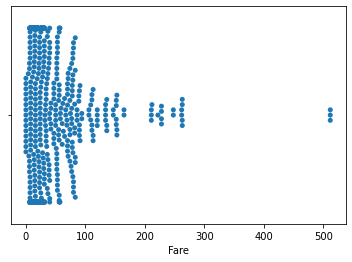

In [ ]:
import seaborn as sns
%matplotlib inline

sns.swarmplot(x='Fare', hue='Survived', data=train6)

In [ ]:
#pd.set_option('display.max_rows', train6['Fare'].shape[0]+1)

In [ ]:
cont = train6.groupby(['Survived','Fare'])['Survived'].count()
cont

Survived  Fare 
0         0.0      14
          4.0       1
          5.0       1
          6.0       5
          7.0      54
                   ..
1         228.0     3
          248.0     1
          262.0     2
          263.0     2
          512.0     3
Name: Survived, Length: 142, dtype: int64

In [ ]:
train6['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

- Change Pclass to categorical (A,B,C)
- Transform in dummies variables: 'Name','Pclass','Sex','Embarked','Family size'

In [ ]:
train6['Pclass'] = train6['Pclass'].replace(to_replace = {1:'A',2:'B',3:'C'})
train6['Pclass'] = train6['Pclass'].astype('category')
train6['Pclass'].value_counts()



C    491
A    216
B    184
Name: Pclass, dtype: int64

In [ ]:
train6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         891 non-null    object  
 1   PassengerId  891 non-null    int64   
 2   Survived     891 non-null    int64   
 3   Pclass       891 non-null    category
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   Fare         891 non-null    float64 
 7   Embarked     889 non-null    object  
 8   Family size  891 non-null    object  
dtypes: category(1), float64(2), int64(2), object(4)
memory usage: 56.8+ KB


In [ ]:
test6['Pclass'] = test6['Pclass'].replace(to_replace = {1:'A',2:'B',3:'C'})
test6['Pclass'] = test6['Pclass'].astype('category')
test6['Pclass'].value_counts()

C    218
A    107
B     93
Name: Pclass, dtype: int64

In [ ]:
dummies = ['Name','Pclass','Sex','Embarked','Family size']
train7 = pd.get_dummies(train6[dummies])
train7.head()

,Name_Capt,Name_Col,Name_Don,Name_Dr,Name_Jonkheer,Name_Lady,Name_Major,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess,Pclass_A,Pclass_B,Pclass_C,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family size_Alone,Family size_Huge,Family size_Large,Family size_Small
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0


In [ ]:
dummies = ['Name','Pclass','Sex','Embarked','Family size']
test7 = pd.get_dummies(test6[dummies])
test7.head()

,Name_Col,Name_Dona,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Pclass_A,Pclass_B,Pclass_C,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family size_Alone,Family size_Huge,Family size_Large,Family size_Small
0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1


In [ ]:
test10 = test7.copy()
train10 = train7.copy()

In [ ]:
print(test7.shape)
print(train7.shape)

(418, 21)
(891, 29)


- Insert zeros in the features of titles that don't have in both datasets (train and test)
- In the test set, don't have: 
[Lady , Mlle, Mme, the Countess, Capt, Don, Jonkheer, Major, Sir]
- And in the train set, don't have:
[Dona]

In [ ]:
train8 = train6.copy()
test8 = test6.copy()

In [ ]:
train8.head(10)

,Name,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Family size
0,Mr,1,0,C,male,22.000000,7.0,S,Small
1,Mrs,2,1,A,female,38.000000,71.0,C,Small
2,Miss,3,1,C,female,26.000000,8.0,S,Alone
3,Mrs,4,1,A,female,35.000000,53.0,S,Small
4,Mr,5,0,C,male,35.000000,8.0,S,Alone
...,...,...,...,...,...,...,...,...,...
886,Rev,887,0,B,male,27.000000,13.0,S,Alone
887,Miss,888,1,A,female,19.000000,30.0,S,Alone
888,Miss,889,0,C,female,21.774238,23.0,S,Large
889,Mr,890,1,A,male,26.000000,30.0,C,Alone


In [ ]:
import numpy as np

train_zeros = np.zeros([891,1])
test_zeros = np.zeros([418,9])

train_zeros_ = pd.DataFrame({'Name_Dona': np.zeros(train7.shape[0], dtype = np.int8)})
test_zeros_ = pd.DataFrame({'Name_Lady': np.zeros(test7.shape[0], dtype = np.int8), 'Name_Mme': np.zeros(test7.shape[0], dtype = np.int8),
                            'Name_Mlle': np.zeros(test7.shape[0], dtype = np.int8), 'Name_the Countess': np.zeros(test7.shape[0], dtype = np.int8),
                            'Name_Capt': np.zeros(test7.shape[0], dtype = np.int8), 'Name_Don': np.zeros(test7.shape[0], dtype = np.int8),
                            'Name_Jonkheer': np.zeros(test7.shape[0], dtype = np.int8), 'Name_Major': np.zeros(test7.shape[0], dtype = np.int8),
                            'Name_Sir': np.zeros(test7.shape[0], dtype = np.int8)})



In [ ]:
train7_ =pd.concat([train_zeros_,train7], axis=1)
train7_

,Name_Dona,Name_Capt,Name_Col,Name_Don,Name_Dr,Name_Jonkheer,Name_Lady,Name_Major,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess,Pclass_A,Pclass_B,Pclass_C,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family size_Alone,Family size_Huge,Family size_Large,Family size_Small
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0
887,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0
888,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0
889,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0


In [ ]:
test7.head(10)

,Name_Col,Name_Dona,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Pclass_A,Pclass_B,Pclass_C,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family size_Alone,Family size_Huge,Family size_Large,Family size_Small
0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0
414,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
415,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0
416,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0


In [ ]:
test_zeros_

,Name_Lady,Name_Mme,Name_Mlle,Name_the Countess,Name_Capt,Name_Don,Name_Jonkheer,Name_Major,Name_Sir
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
413,0,0,0,0,0,0,0,0,0
414,0,0,0,0,0,0,0,0,0
415,0,0,0,0,0,0,0,0,0
416,0,0,0,0,0,0,0,0,0


In [ ]:
test7_ =pd.concat([test_zeros_,test7], axis=1)
test7_

,Name_Lady,Name_Mme,Name_Mlle,Name_the Countess,Name_Capt,Name_Don,Name_Jonkheer,Name_Major,Name_Sir,Name_Col,Name_Dona,Name_Dr,Name_Master,Name_Miss,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Pclass_A,Pclass_B,Pclass_C,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family size_Alone,Family size_Huge,Family size_Large,Family size_Small
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0
414,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0
415,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0
416,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0


In [ ]:
train1_ = pd.concat([train8,train7_], axis=1).drop(dummies, axis=1) 
print(display(train1_.head()))
train1_.shape

,PassengerId,Survived,Age,Fare,Name_Dona,Name_Capt,Name_Col,Name_Don,Name_Dr,Name_Jonkheer,Name_Lady,Name_Major,Name_Master,Name_Miss,Name_Mlle,Name_Mme,Name_Mr,Name_Mrs,Name_Ms,Name_Rev,Name_Sir,Name_the Countess,Pclass_A,Pclass_B,Pclass_C,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family size_Alone,Family size_Huge,Family size_Large,Family size_Small
0,1,0,22.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
1,2,1,38.0,71.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
2,3,1,26.0,8.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0
3,4,1,35.0,53.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
4,5,0,35.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0


None


(891, 34)

In [ ]:
test1_ = pd.concat([test8,test7_], axis=1).drop(dummies, axis=1) 
test1_.head()
test1_.shape

(418, 33)

In [ ]:
test1_.to_csv('Titanic_new_pronto[test]_.csv')
train1_.to_csv('Titanic_new_pronto[train]_.csv')

The rest of data analisis are in 'Titanic_Cabin_part2'